In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('../Data/01_raw/attrition_train.csv', low_memory = False)

In [21]:
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,38,No,Travel_Frequently,240,Research & Development,2,4,Life Sciences,1,803,...,4,80,0,17,2,3,15,7,4,12
1,52,No,Travel_Frequently,322,Research & Development,28,2,Medical,1,1401,...,2,80,1,24,3,2,5,3,0,2
2,28,No,Non-Travel,1476,Research & Development,1,3,Life Sciences,1,1315,...,1,80,3,10,6,3,9,8,7,5
3,43,No,Travel_Rarely,920,Research & Development,3,3,Life Sciences,1,1255,...,2,80,1,25,2,3,8,7,0,7
4,27,No,Non-Travel,443,Research & Development,3,3,Medical,1,850,...,3,80,3,0,6,2,0,0,0,0


## 1. Définition des données  
- Age : âge des employés  
- Attrition : l'employé a quitté ou non la société  
- BusinessTravel : fréquence des voyages d'affaires
- DailyRate : salaire journalier  
- Department : service dans lequel travaille l'employé
- DistanceFromHome : distance entre le lieu de travai la maison  
- Education : niveau de diplôme de la personne  
- EMployeeNumber : numéro de l'employé  
- EnvironmentSatisfaction : niveau de satisfaction pour le cadre de travail  
- HourlyRate : salaire horaire  
- JobInvolvement : niveau d'implication au travail  
- JobLevel : niveau hiérarchique de la personne  
- MaritalStatus : situation maritale de l'employé
- JobSatisfaction : niveau de satisfaction de la personne pour son poste  
- MonthlyIncome : salaire mensuel perçu par l'employé
- MonthlyRate : 
- NumCompaniesWorked : nombre de sociétés dans lequel la personne travail
- Over18 : l'employé est majeur
- OverTime : heures supplémentaires effectuées ou non
- PercentSalaryHike : % d'augmentation du salaire par rapport à l'ancien salaire
- PerformanceRating : évaluation du niveau de performance d'un employé  
- RelationshipSatisfaction : niveau de satisfaction de l'employé sur ses relation au travail
- StandardHours : Nombre d'heures de travail effectuées sur la semaine  
- StockOptionLevel : niveau de prise de participation aux actions de l'entreprise  
- TotalWorkingYears : années d'expérience professionnel  
- TrainingTimesLastYear : durée moyenne de formation en jour l'année précédente  
- WorkLifeBalance : équilibre entre le temps de travail et le temps domestique
- YearsAtCompany : nombre d'années dans la société
- YearsInCurrentRole : nombre d'années passées dans le poste actuel  
- YearsSinceLastPromotion : nombre d'années depuis la dernière promotion du salarié  
- YearsWithCurrManager : nombre d'années passées avec le même manager

## 2. Checklist

### 1. Analyse de forme
- **Variable target** : attrition score  
- **Lignes et colonnes** : 1100 lignes et 35 colonnes
- **Types de variables** : 26 variables quantitatives, 9 variables qualitatives  
- **Analyse des valeurs manquantes** : aucune valeur manquante

### 2. Analyse de fond
- **Visualisation de la target** : 83.8% no, 16.2% yes  
- **Signification des variables** :

### 1. Analyse de forme

In [22]:
df.shape

(1100, 35)

In [23]:
df.dtypes.value_counts()

int64     26
object     9
dtype: int64

## 2. Vérification des corrélations éventuelles

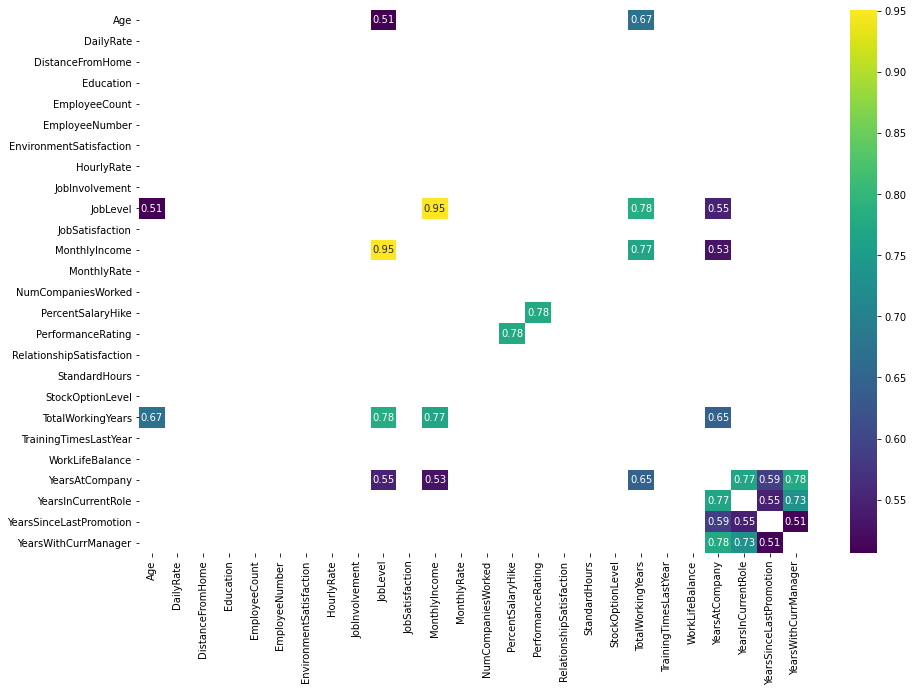

In [24]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(15,10))
sns.heatmap(filteredDf, annot=True, cmap="viridis")
plt.show()

In [25]:
# target variable visualization
df['Attrition'].value_counts(normalize = True)

No     0.838182
Yes    0.161818
Name: Attrition, dtype: float64

### 1. Création de sous-ensembles

In [50]:
df.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [27]:
# creation of negative and postive subsets
positive_df = df[df['Attrition'] == 'Yes']
negative_df = df[df['Attrition'] == 'No']

In [48]:
# creation of income subset
cont_columns = df[['Age', 'Salary', 'DistanceFromHome', 'EmployeeCount', 'PercentSalaryHike', 'YearsAtCompany', 'TrainingTimesLastYear', 'TotalWorkingYears', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [29]:
# creation of satisfaction subset
dis_columns = df.select_dtypes('float')

In [30]:
# # creation of experience/education subset
# experience_columns = df[['Education', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Age']]

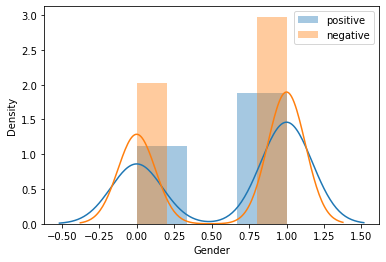

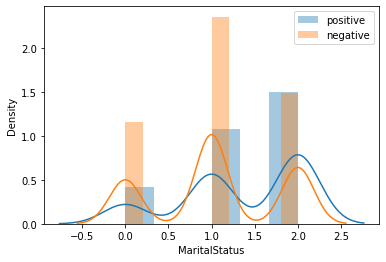

In [49]:
for col in float_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

**Remarques** :  
- Les revenus semblent ne pas apporter d'explications significatives dans le départ ou non d'un salarié  
- On remarque toutefois que les employés ayant quitté l'entreprise sont moins bien payées globalement et les droits sur les stocks options sont moins importants

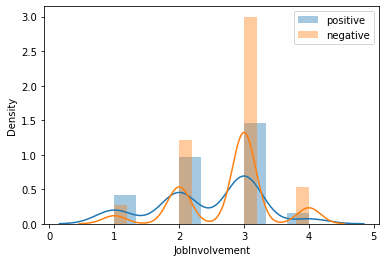

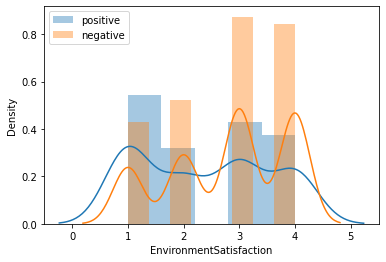

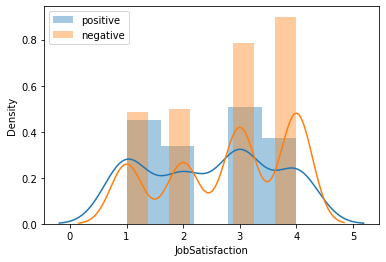

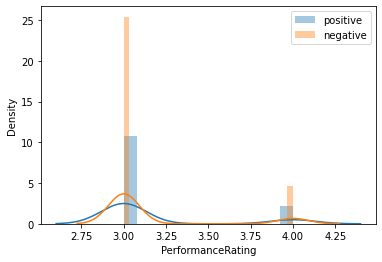

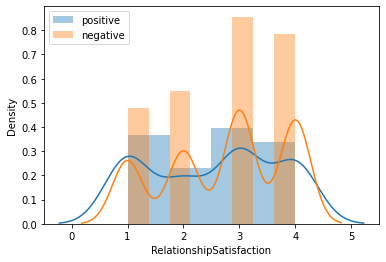

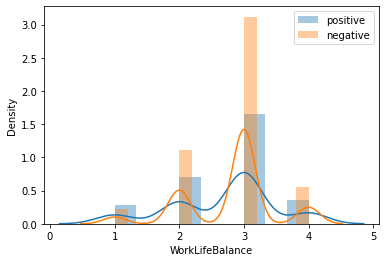

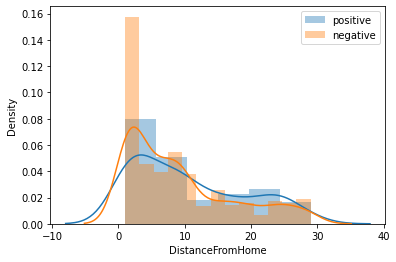

In [33]:
for col in satisfaction_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

**Remarques** :  
- Les personnes ayant quitté l'entreprise semblent moins satisfaites de leur environnement de travail  
- De la même manière, la qualité des relations avec leur collègues est moindre par rapport aux peronnes n'ayant pas quitté l'entreprise  
- Enfin, elles trouvent également moins d'intérêt dans leur travail que les autres

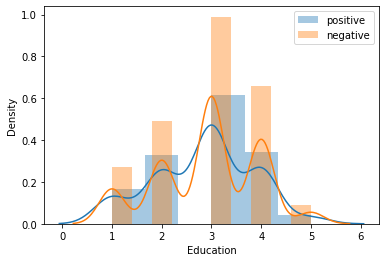

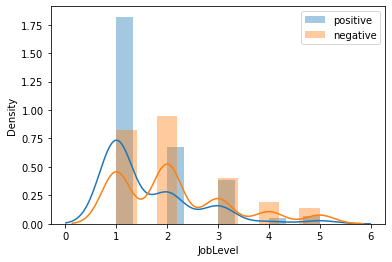

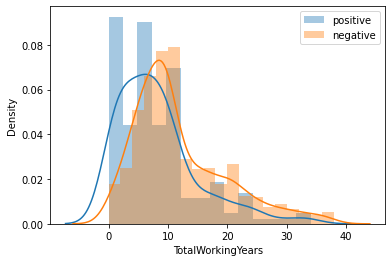

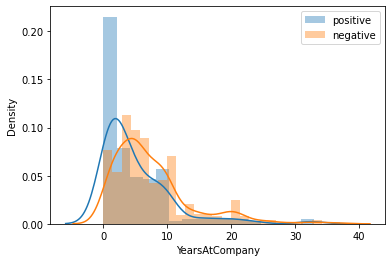

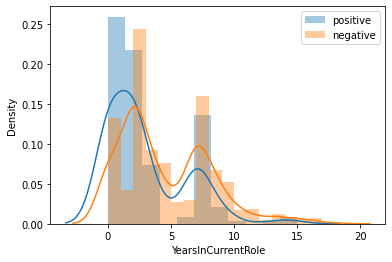

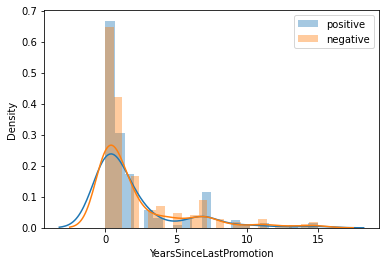

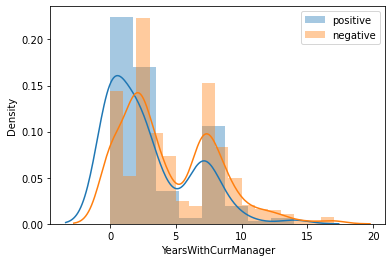

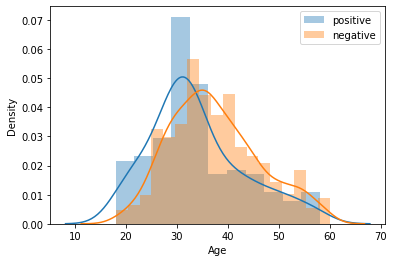

In [34]:
for col in experience_columns:
    plt.figure()
    sns.distplot(positive_df[col], label='positive')
    sns.distplot(negative_df[col], label='negative')
    plt.legend()

**Remarques** :
- Les employés qui quittent l'entreprise sont généralement en bas de la hiérarchie
- Ils possèdent également moins d'expérience professionnelle que ceux qui sont toujours employés dans l'entreprise